# Detector Númerico - MNIST
### Real Time Detector

- Cargar librerias

In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras import Sequential
from keras.datasets import mnist

import mss
import time
import os

- Cargar Pesos

In [5]:
from keras.models import load_model

cnn_model = load_model('save/model_h5/CNN_PREDICT_NUMBER_v.1.2.h5')

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


- Evaluar Dataset

In [7]:
H,W,C = 28,28,1

#Download Dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

#Reshape
x_train = x_train_original.reshape(x_train_original.shape[0], H, W, C)
x_test = x_test_original.reshape(x_test_original.shape[0], H, W, C)

INPUT_SIZE = (H,W,C)

#Normalize
x_train = x_train / 255
x_test = x_test / 255

#One Hot Encode
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)

In [8]:
score = cnn_model.evaluate(x_test, y_test)
print("ACC: ", (score[1]*100), "%")

10000/10000 [==============================] - 9s 930us/step
ACC:  98.79 %


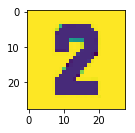

Predict:  2


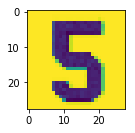

Predict:  5


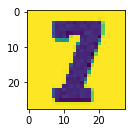

Predict:  1


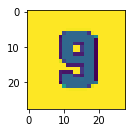

Predict:  8


In [43]:
images = os.listdir("./image")

c=1

for image in images:
    plt.subplot(2,3,c)
    img = cv2.imread("./image/" + image, 1)
    
 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(28,28))
    
    toPred = img.reshape(1,28,28,1)
    pred = cnn_model.predict(toPred)
    
    
    plt.imshow(img)
    plt.show()
    c+=1
    
    print("Predict: ", np.argmax(pred[0]))
    if c > len(images):
        break
    
    